<a href="https://colab.research.google.com/github/MariaGodoi/cn1t2/blob/main/Quest%C3%A3o_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

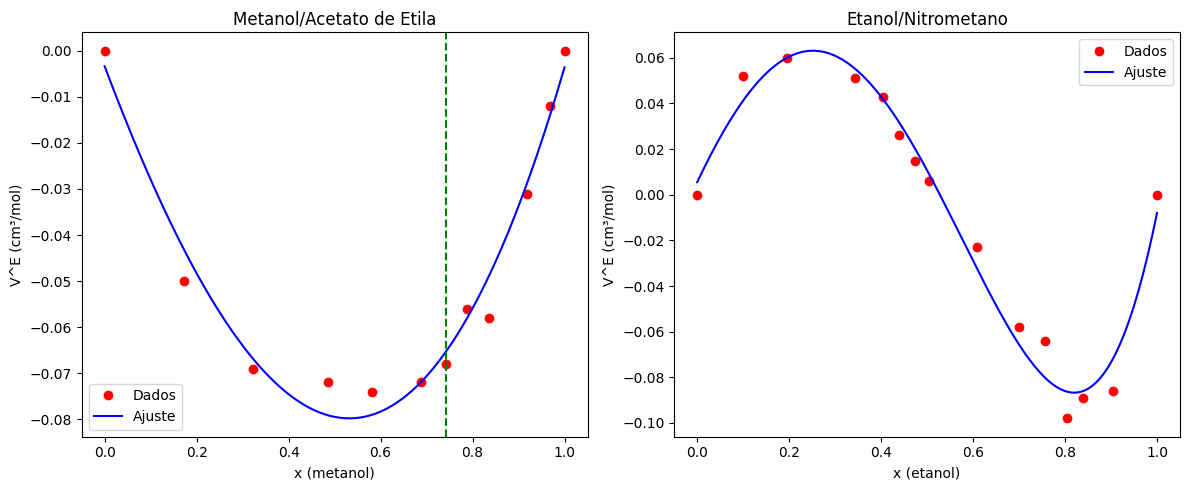

Volumes molares parciais em x = 0.7433:
Metanol = -0.0287 cm³/mol
Acetato de etila = -0.1707 cm³/mol


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import curve_fit

# Dados metanol/acetato de etila
x_m = np.array([0.0000,0.1719,0.3219,0.4856,0.5810,0.6871,
                0.7433,0.7871,0.8362,0.9175,0.9689,1.0000])
VEm = np.array([0.0000,-0.0500,-0.0690,-0.0720,-0.0740,-0.0720,
                -0.0680,-0.0560,-0.0580,-0.0310,-0.0120,0.0000])

# Dados etanol/nitrometano
x_e = np.array([0.0000,0.1000,0.1961,0.3436,0.4043,0.4393,
                0.4734,0.5033,0.6077,0.7005,0.7567,0.8039,
                0.8386,0.9039,1.0000])
VEe = np.array([0.000,0.052,0.060,0.051,0.043,0.026,
                0.015,0.006,-0.023,-0.058,-0.064,-0.098,
                -0.089,-0.086,0.000])

# ---- (a) Volumes parciais metanol/acetato ----
def vol_parciais(x, VE, x0):
    p  = np.poly1d(np.polyfit(x, VE, 3))
    dp = np.polyder(p)
    VE0 = p(x0)
    dVE0 = dp(x0)
    V1 = VE0 + (1 - x0)*dVE0
    V2 = VE0 - x0*dVE0
    return V1, V2, p

V1, V2, p_m = vol_parciais(x_m, VEm, 0.7433)

# ---- (b) Gráfico VE(x) etanol/nitrometano ----
p_e = np.poly1d(np.polyfit(x_e, VEe, 4))
xf = np.linspace(0,1,200)

plt.figure(figsize=(12,5))

# Metanol/acetato
plt.subplot(1,2,1)
plt.plot(x_m, VEm, 'ro', label="Dados")
plt.plot(xf, p_m(xf), 'b-', label="Ajuste")
plt.axvline(0.7433, color='g', ls='--')
plt.title("Metanol/Acetato de Etila")
plt.xlabel("x (metanol)")
plt.ylabel("V^E (cm³/mol)")
plt.legend()

# Etanol/nitrometano
plt.subplot(1,2,2)
plt.plot(x_e, VEe, 'ro', label="Dados")
plt.plot(xf, p_e(xf), 'b-', label="Ajuste")
plt.title("Etanol/Nitrometano")
plt.xlabel("x (etanol)")
plt.ylabel("V^E (cm³/mol)")
plt.legend()

plt.tight_layout()
plt.show()

print("Volumes molares parciais em x = 0.7433:")
print(f"Metanol = {V1:.4f} cm³/mol")
print(f"Acetato de etila = {V2:.4f} cm³/mol")